Link to DATASET: 'https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import os
path = os.listdir('C:/Users/Howida Abd El-Halim/CodeClauseInternship_BrainTumorDetection/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/Howida Abd El-Halim/CodeClauseInternship_BrainTumorDetection/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])


The resized image is appended to the X list, which will store the image data.
The corresponding label for the current class (classes[cls]) is appended to the Y list equal to a mapping between the class names and their labels in the classes dictionary or list.

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
X = np.array(X)
Y = np.array(Y)

In [7]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

We can conclude that there is 827 patients have brain tumor while 395 have not

In [8]:
X.shape

(1222, 200, 200)

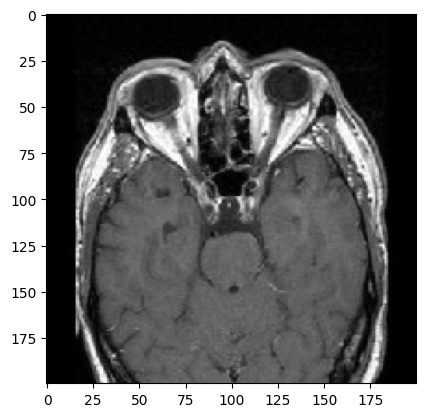

In [9]:
plt.imshow(X[0], cmap='gray')

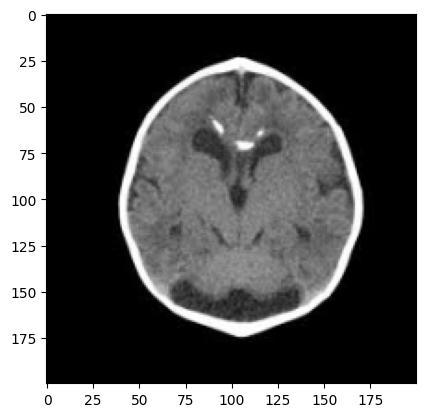

In [10]:
plt.imshow(X[10], cmap='gray')

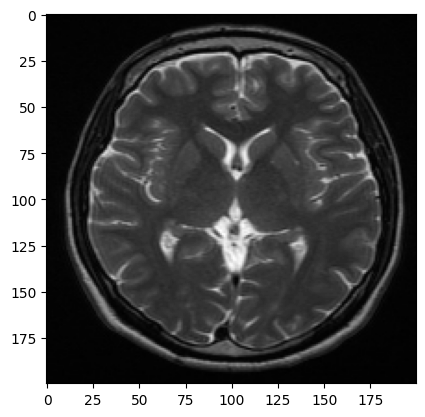

In [12]:
plt.imshow(X[39], cmap='gray')

In [13]:
X_updated = X.reshape(len(X),-1)
X_updated.shape

(1222, 40000)

From 1222 samples I am going to use 20% of it as a test set and the remaining 80% for training

That would be 245 samples for testing and 977 for training samples

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [15]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [16]:
xtrain = xtrain/255
xtest = xtest/255

In [17]:
from sklearn.decomposition import PCA

In [18]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


Trainig Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [21]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Evaluation

In [23]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [24]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(pca_train, ytrain)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(pca_train, ytrain)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(pca_train, ytrain)




DecisionTreeClassifier(random_state=42)

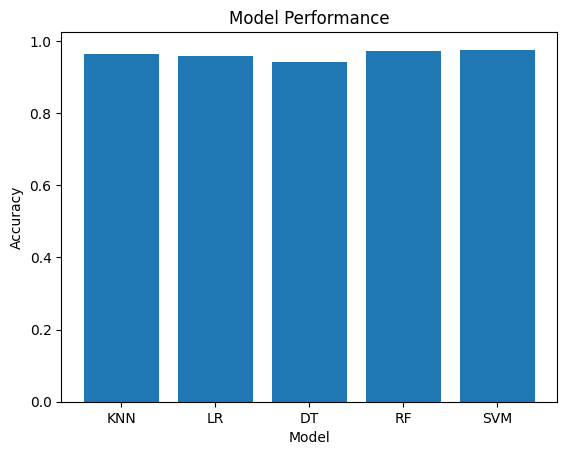

In [ ]:
sv_score = sv.score(pca_test, ytest)
lg_score = lg.score(pca_test, ytest)
knn_score = knn.score(pca_test, ytest)
dt_score = dt.score(pca_test, ytest)
rf_score = rf.score(pca_test, ytest)

models = ['KNN', 'LR', 'DT', 'RF', 'SVM']
accuracies = [sv_score, lg_score, knn_score, dt_score, rf_score]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance')
plt.show()

The Support vector is better than logistic Regression, The error in sv is less than in lg

Predection using support vector machine

In [26]:
prediction = sv.predict(pca_test)
np.where(ytest!=prediction)

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [27]:
prediction[6]

0

In [28]:
ytest[6]

0

In [29]:
prediction[36]

0

In [30]:
ytest[36]

1

Test Model

In [31]:
dictionary = {0:'Patient has no brain tumor',
            1:'Patient has brain tumor'}

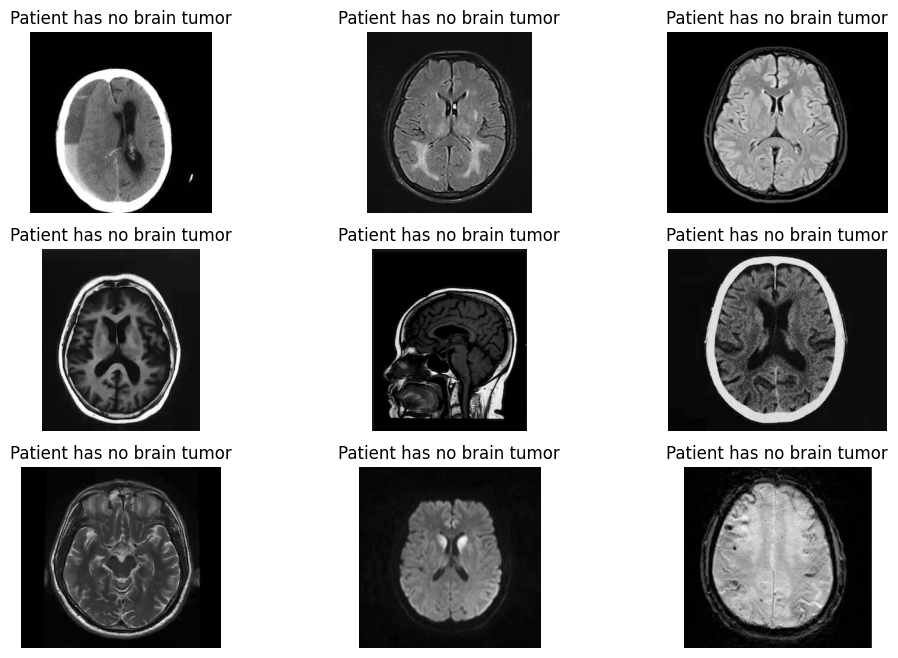

In [32]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/Howida Abd El-Halim/CodeClauseInternship_BrainTumorDetection/Testing/')
c=1
for i in os.listdir('C:/Users/Howida Abd El-Halim/CodeClauseInternship_BrainTumorDetection/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('C:/Users/Howida Abd El-Halim/CodeClauseInternship_BrainTumorDetection/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dictionary[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

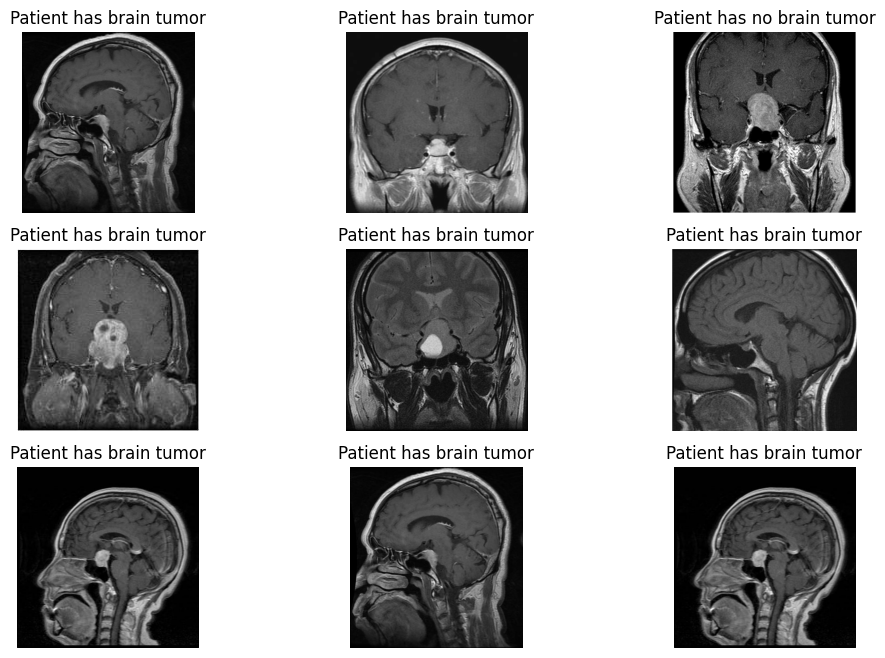

In [33]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/Howida Abd El-Halim/CodeClauseInternship_BrainTumorDetection/Testing/')
c=1
for i in os.listdir('C:/Users/Howida Abd El-Halim/CodeClauseInternship_BrainTumorDetection/Testing/pituitary_tumor/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('C:/Users/Howida Abd El-Halim/CodeClauseInternship_BrainTumorDetection/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dictionary[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

Created a file that consists images of both patients with tumor and none:
4 patients have tumor and 5 have no tumor :)

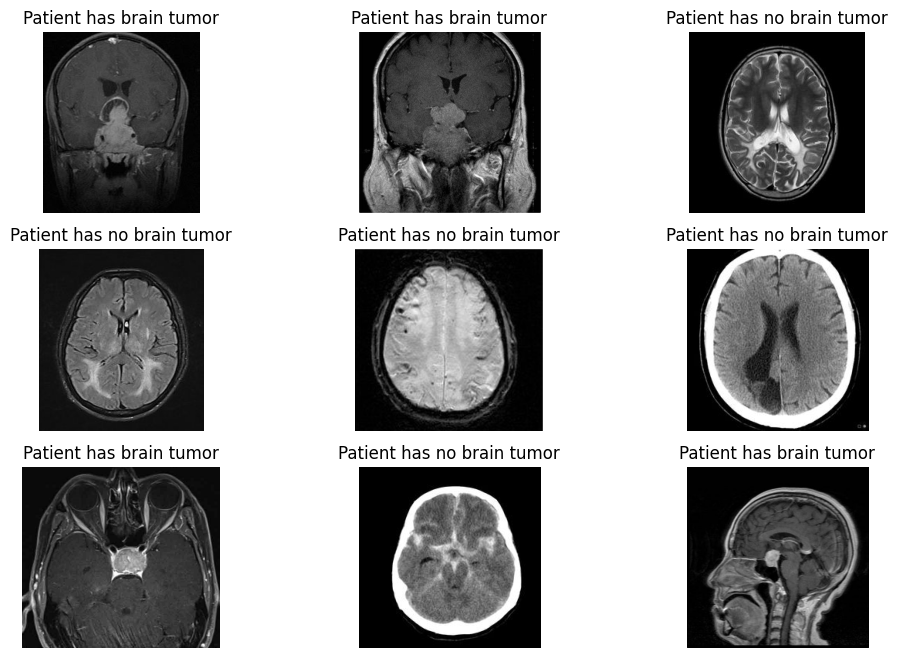

In [34]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/Howida Abd El-Halim/CodeClauseInternship_BrainTumorDetection/Testing/')
c=1
for i in os.listdir('C:/Users/Howida Abd El-Halim/CodeClauseInternship_BrainTumorDetection/Testing/mixed/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('C:/Users/Howida Abd El-Halim/CodeClauseInternship_BrainTumorDetection/Testing/mixed/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dictionary[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1